# Load Libraries

In [1]:
import sys
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd
from cphmdanalysis import compute_pkas as pka
from cphmdanalysis import HH_fitting as pka_fit
from cphmdanalysis import plotting_lambda_data as plotting
import glob as g

# Paths, pHs, and Stages

In [2]:
path   = '/data/jackh/plasmepsin/holo_plasmepsin/run'
phs    = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
#phs = [5.0]
sstage = 21 # 21
lstage = 42 # 42 
stages = [x for x in range(sstage, lstage+1)]

# Handling and Loading Lambda Files

## Seed Files

In [3]:
files = []
for ph in phs:
    files.append(g.glob('{}/stage{}/*ph{}*lamb*'.format(path, sstage, ph)))

In [4]:
files

[['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph1.0_temp300.0.lamb_2'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph1.5_temp300.0.lamb_3'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph2.0_temp300.0.lamb_4'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph2.5_temp300.0.lamb_6'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph3.0_temp300.0.lamb_8'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph3.5_temp300.0.lamb_10'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph4.0_temp300.0.lamb_12'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph4.5_temp300.0.lamb_14'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph5.0_temp300.0.lamb_16'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph5.5_temp300.0.lamb_17'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph6.0_temp300.0.lamb_18'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_

In [5]:
ph_objects = [cphmd.lambda_data(x[0]) for x in files]

In [6]:
print('Number of pH objects in the data list: {}'.format(len(ph_objects)))
print('Number of pH replicas used: {}'.format(len(files)))

Number of pH objects in the data list: 16
Number of pH replicas used: 16


## Add Lambda Files

In [7]:
for rep, ph in enumerate(phs):
    for stage in stages[1:]:
        file = g.glob('{}/stage{}/*ph{}*lamb*'.format(path, stage, ph))
        ph_objects[rep].add_l_file(file_path=file[0])
        print("{} Added".format(file[0]))

/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sme_ph1.0_tem

/data/jackh/plasmepsin/holo_plasmepsin/run/stage35/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage36/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage37/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage38/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage39/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage40/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage41/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage42/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph3.5_

/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph5.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph5.5_temp300.0.lamb_17 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage34/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage35/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage36/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage37/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage38/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage39/1sm

/data/jackh/plasmepsin/holo_plasmepsin/run/stage40/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage41/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage42/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sm

## Check Data

In [8]:
print('Number of pHs: {}'.format(len(ph_objects)))
print('Number of titra site: {}'.format(ph_objects[0].n_ititr))
print('Number of lambda vals: {}'.format(len(ph_objects[0].lambda_and_x_vals[0])))

Number of pHs: 16
Number of titra site: 96
Number of lambda vals: 24750


In [9]:
import pandas as pd
pd.set_option('display.max_rows', None) # prevents truncation of the dataframe
ph_objects[0].info_table

Ititr  Ires  Itauto
0       1     4       3
1       2     4       4
2       3     7       3
3       4     7       4
4       5    10       3
5       6    10       4
6       7    19       3
7       8    19       4
8       9    21       3
9      10    21       4
10     11    24       3
11     12    24       4
12     13    34       3
13     14    34       4
14     15    56       1
15     16    56       2
16     17    59       3
17     18    59       4
18     19    67       3
19     20    67       4
20     21    69       3
21     22    69       4
22     23    74       3
23     24    74       4
24     25    89       3
25     26    89       4
26     27   104       3
27     28   104       4
28     29   107       3
29     30   107       4
30     31   112       3
31     32   112       4
32     33   121       3
33     34   121       4
34     35   130       3
35     36   130       4
36     37   137       3
37     38   137       4
38     39   142       3
39     40   142       4
40     41   150       3
41     42   150       4
42     43   161       1
43     44   161       2
44     45   162       3
45     46   162       4
46     47   164       1
47     48   164       2
48     49   174       3
49     50   174       4
50     51   175       3
51     52   175       4
52     53   179       3
53     54   179       4
54     55   185       3
55     56   185       4
56     57   189       1
57     58   189       2
58     59   190       3
59     60   190       4
60     61   198       3
61     62   198       4
62     63   200       1
63     64   200       2
64     65   207       3
65     66   207       4
66     67   214       3
67     68   214       4
68     69   225       3
69     70   225       4
70     71   235       3
71     72   235       4
72     73   258       3
73     74   258       4
74     75   262       3
75     76   262       4
76     77   269       3
77     78   269       4
78     79   271       3
79     80   271       4
80     81   276       1
81     82   276       2
82     83   278       3
83     84   278       4
84     85   279       3
85     86   279       4
86     87   293       3
87     88   293       4
88     89   303       3
89     90   303       4
90     91   314       3
91     92   314       4
92     93   316       3
93     94   316       4
94     95   318       1
95     96   318       2

# Do Calculation

## Imporant Residues

In [10]:
important_resids = [4, 34, 161, 214, 303]
resids = ph_objects[0].find_residues(important_resids)
print(resids)  

[0, 6, 21, 33, 44]


## Calculate the Unprotonated Fraction foreach Titratable Site

In [11]:
for x in range(len(ph_objects)):
    print('--- pH {} ----------------------------'.format(phs[x]))
    ph_objects[x].compute_all_s_values(output=True)

--- pH 1.0 ----------------------------
ires | itaut | S(unprot) | Pure | Mixed
   4     3       0.00      0.86   0.14
   4     4       0.00
   4     4       0.00
   7     3       0.01      0.92   0.08
   7     4       0.01
   7     4       0.01
  10     3       0.18      0.76   0.24
  10     4       0.28
  10     4       0.35
  19     3       0.00      0.93   0.07
  19     4       0.00
  19     4       0.00
  21     3       0.00      0.92   0.08
  21     4       0.00
  21     4       0.00
  24     3       0.02      0.88   0.12
  24     4       0.04
  24     4       0.04
  34     3       0.06      0.25   0.75
  34     4       0.09
  34     4       0.12
  56     1       0.00      0.93   0.07
  56     2       0.00
  56     2       0.00
  59     3       0.04      0.91   0.09
  59     4       0.08
  59     4       0.08
  67     3       0.01      0.91   0.09
  67     4       0.01
  67     4       0.01
  69     3       0.05      0.90   0.10
  69     4       0.09
  69     4       0.09
  74   

  19     3       0.01      0.93   0.07
  19     4       0.01
  19     4       0.01
  21     3       0.01      0.92   0.08
  21     4       0.01
  21     4       0.01
  24     3       0.09      0.86   0.14
  24     4       0.17
  24     4       0.17
  34     3       0.23      0.26   0.74
  34     4       0.37
  34     4       0.38
  56     1       0.00      0.93   0.07
  56     2       0.00
  56     2       0.00
  59     3       0.20      0.89   0.11
  59     4       0.33
  59     4       0.33
  67     3       0.06      0.89   0.11
  67     4       0.11
  67     4       0.11
  69     3       0.20      0.90   0.10
  69     4       0.33
  69     4       0.34
  74     3       0.06      0.89   0.11
  74     4       0.11
  74     4       0.11
  89     3       0.09      0.76   0.24
  89     4       0.16
  89     4       0.16
 104     3       0.07      0.86   0.14
 104     4       0.12
 104     4       0.12
 107     3       0.03      0.92   0.08
 107     4       0.05
 107     4       0.06
 112

  21     3       0.04      0.90   0.10
  21     4       0.07
  21     4       0.08
  24     3       0.39      0.85   0.15
  24     4       0.56
  24     4       0.56
  34     3       0.56      0.37   0.63
  34     4       0.74
  34     4       0.70
  56     1       0.00      0.93   0.07
  56     2       0.00
  56     2       0.00
  59     3       0.70      0.88   0.12
  59     4       0.81
  59     4       0.83
  67     3       0.33      0.86   0.14
  67     4       0.49
  67     4       0.51
  69     3       0.60      0.90   0.10
  69     4       0.75
  69     4       0.75
  74     3       0.25      0.86   0.14
  74     4       0.40
  74     4       0.39
  89     3       0.40      0.65   0.35
  89     4       0.58
  89     4       0.56
 104     3       0.31      0.86   0.14
 104     4       0.48
 104     4       0.48
 107     3       0.21      0.88   0.12
 107     4       0.35
 107     4       0.35
 112     3       0.02      0.81   0.19
 112     4       0.04
 112     4       0.04
 121

  56     1       0.00      0.93   0.07
  56     2       0.00
  56     2       0.00
  59     3       0.89      0.90   0.10
  59     4       0.95
  59     4       0.94
  67     3       0.80      0.88   0.12
  67     4       0.88
  67     4       0.90
  69     3       0.89      0.91   0.09
  69     4       0.93
  69     4       0.95
  74     3       0.71      0.86   0.14
  74     4       0.82
  74     4       0.84
  89     3       0.79      0.72   0.28
  89     4       0.89
  89     4       0.87
 104     3       0.75      0.88   0.12
 104     4       0.85
 104     4       0.86
 107     3       0.77      0.86   0.14
 107     4       0.87
 107     4       0.87
 112     3       0.11      0.78   0.22
 112     4       0.19
 112     4       0.19
 121     3       0.78      0.88   0.12
 121     4       0.91
 121     4       0.85
 130     3       0.64      0.89   0.11
 130     4       0.77
 130     4       0.78
 137     3       0.95      0.92   0.08
 137     4       0.97
 137     4       0.98
 142

  89     3       0.95      0.80   0.20
  89     4       0.98
  89     4       0.98
 104     3       0.97      0.91   0.09
 104     4       0.99
 104     4       0.99
 107     3       0.94      0.88   0.12
 107     4       0.97
 107     4       0.97
 112     3       0.40      0.72   0.28
 112     4       0.57
 112     4       0.57
 121     3       0.96      0.90   0.10
 121     4       0.98
 121     4       0.98
 130     3       0.88      0.90   0.10
 130     4       0.93
 130     4       0.94
 137     3       0.99      0.93   0.07
 137     4       1.00
 137     4       0.99
 142     3       0.55      0.84   0.16
 142     4       0.71
 142     4       0.72
 150     3       0.86      0.88   0.12
 150     4       0.92
 150     4       0.93
 161     1       0.03      0.91   0.09
 161     2       0.03
 161     2       0.01
 162     3       0.98      0.92   0.08
 162     4       0.99
 162     4       0.99
 164     1       0.00      0.92   0.08
 164     2       0.00
 164     2       0.00
 174

 142     3       0.92      0.88   0.12
 142     4       0.95
 142     4       0.96
 150     3       0.98      0.90   0.10
 150     4       0.99
 150     4       0.99
 161     1       0.11      0.91   0.09
 161     2       0.08
 161     2       0.04
 162     3       0.99      0.92   0.08
 162     4       1.00
 162     4       1.00
 164     1       0.02      0.92   0.08
 164     2       0.01
 164     2       0.00
 174     3       0.97      0.91   0.09
 174     4       0.99
 174     4       0.98
 175     3       0.99      0.91   0.09
 175     4       0.99
 175     4       0.99
 179     3       0.99      0.91   0.09
 179     4       0.99
 179     4       1.00
 185     3       0.99      0.88   0.12
 185     4       1.00
 185     4       0.99
 189     1       0.24      0.94   0.06
 189     2       0.23
 189     2       0.01
 190     3       0.98      0.92   0.08
 190     4       0.99
 190     4       0.99
 198     3       0.99      0.93   0.07
 198     4       1.00
 198     4       1.00
 200

 179     3       1.00      0.93   0.07
 179     4       1.00
 179     4       1.00
 185     3       1.00      0.91   0.09
 185     4       1.00
 185     4       1.00
 189     1       0.78      0.97   0.03
 189     2       0.78
 189     2       0.05
 190     3       1.00      0.93   0.07
 190     4       1.00
 190     4       1.00
 198     3       1.00      0.93   0.07
 198     4       1.00
 198     4       1.00
 200     1       0.33      0.80   0.20
 200     2       0.19
 200     2       0.21
 207     3       1.00      0.93   0.07
 207     4       1.00
 207     4       1.00
 214     3       0.99      0.93   0.07
 214     4       1.00
 214     4       1.00
 225     3       1.00      0.93   0.07
 225     4       1.00
 225     4       1.00
 235     3       1.00      0.92   0.08
 235     4       1.00
 235     4       1.00
 258     3       1.00      0.93   0.07
 258     4       1.00
 258     4       1.00
 262     3       1.00      0.92   0.08
 262     4       1.00
 262     4       1.00
 269

 200     1       0.76      0.78   0.22
 200     2       0.61
 200     2       0.62
 207     3       1.00      0.93   0.07
 207     4       1.00
 207     4       1.00
 214     3       1.00      0.93   0.07
 214     4       1.00
 214     4       1.00
 225     3       1.00      0.93   0.07
 225     4       1.00
 225     4       1.00
 235     3       1.00      0.93   0.07
 235     4       1.00
 235     4       1.00
 258     3       1.00      0.94   0.06
 258     4       1.00
 258     4       1.00
 262     3       1.00      0.93   0.07
 262     4       1.00
 262     4       1.00
 269     3       1.00      0.94   0.06
 269     4       1.00
 269     4       1.00
 271     3       1.00      0.93   0.07
 271     4       1.00
 271     4       1.00
 276     1       0.89      0.87   0.13
 276     2       0.80
 276     2       0.79
 278     3       1.00      0.93   0.07
 278     4       1.00
 278     4       1.00
 279     3       1.00      0.93   0.07
 279     4       1.00
 279     4       1.00
 293

# Calculate Running S Convergence

In [12]:
for x in range(len(phs)):
    ph_objects[x].compute_all_running_s()

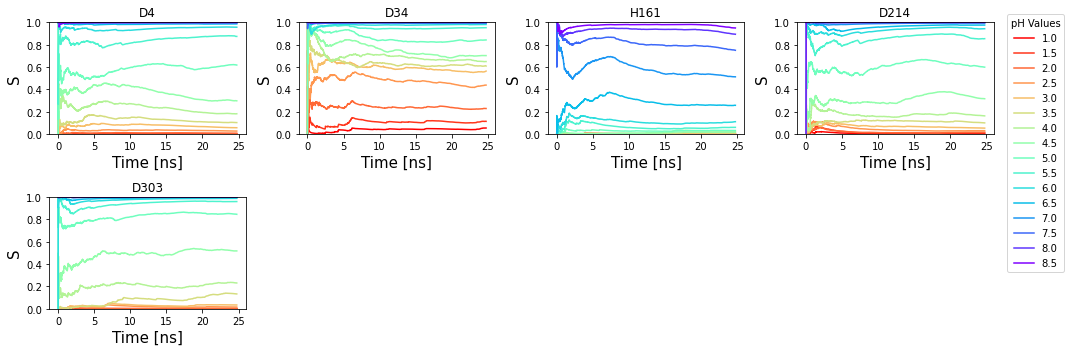

In [13]:
titles = ['D4', 'D34', 'H161', 'D214', 'D303']
plotting.plot_running_s(ph_objects, phs, resids, titles, xlabel='Time [ns]', steps_to_time_conversion=(1/1000), save_fig=False, output='s_conv_holo.png')

## Calculate pKas 

In [14]:
pkas = pka(phs, ph_objects)

In [15]:
for n, pka in enumerate(pkas):
    if pka[0] == 'NaN' or (pka[0] > max(phs) or pka[0] < min(phs)):
        print('Resid: {0:3} pKa: No Titration'.format(ph_objects[0].ires[n]))
    else:
        print('Resid: {0:3} pKa: {1:>3.1f} Hill: {2:>3.2f}'.format(ph_objects[0].ires[n], pka[0], pka[1]))

Resid:   4 pKa: 4.8 Hill: 0.98
Resid:   7 pKa: 3.6 Hill: 0.87
Resid:  10 pKa: 2.1 Hill: 0.58
Resid:  19 pKa: 4.8 Hill: 0.76
Resid:  21 pKa: 4.8 Hill: 0.78
Resid:  24 pKa: 3.5 Hill: 0.57
Resid:  34 pKa: 3.1 Hill: 0.43
Resid:  56 pKa: No Titration
Resid:  59 pKa: 2.7 Hill: 0.84
Resid:  67 pKa: 3.3 Hill: 0.90
Resid:  69 pKa: 2.8 Hill: 0.79
Resid:  74 pKa: 3.5 Hill: 0.87
Resid:  89 pKa: 3.3 Hill: 0.78
Resid: 104 pKa: 3.4 Hill: 0.82
Resid: 107 pKa: 3.5 Hill: 0.97
Resid: 112 pKa: 5.3 Hill: 0.72
Resid: 121 pKa: 3.3 Hill: 0.85
Resid: 130 pKa: 3.6 Hill: 0.68
Resid: 137 pKa: 2.2 Hill: 0.79
Resid: 142 pKa: 4.9 Hill: 0.87
Resid: 150 pKa: 4.1 Hill: 0.89
Resid: 161 pKa: 7.0 Hill: 0.90
Resid: 162 pKa: 2.9 Hill: 0.85
Resid: 164 pKa: 8.4 Hill: 0.83
Resid: 174 pKa: 4.3 Hill: 0.72
Resid: 175 pKa: 3.8 Hill: 0.85
Resid: 179 pKa: 3.7 Hill: 0.83
Resid: 185 pKa: 3.7 Hill: 0.75
Resid: 189 pKa: 6.5 Hill: 0.96
Resid: 190 pKa: 4.1 Hill: 0.93
Resid: 198 pKa: 3.5 Hill: 0.74
Resid: 200 pKa: 7.4 Hill: 0.83
Resid: 207

# Plot Titration Curves

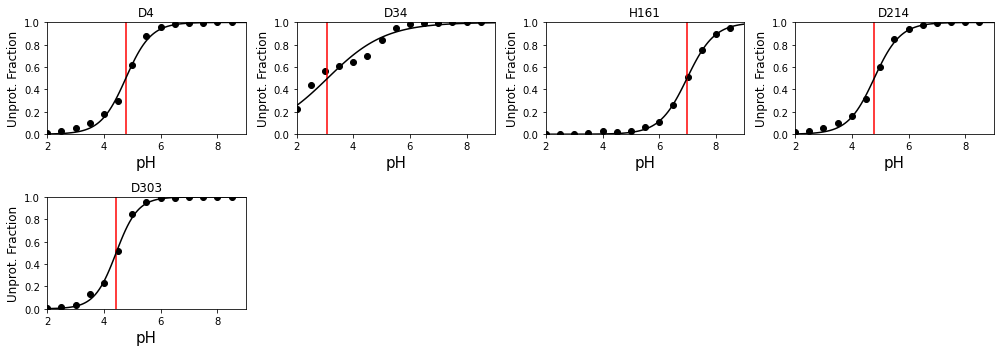

In [16]:
plotting.plot_titration_curves(ph_objects, phs, resids, titles, xrange=[2,9])

## Save Data

In [30]:
with open('../data/holo_D34_D214_S_s21_to_42.dat', 'w') as o:
    o.write('# pH, S_D34, S_D214 \n')
    for n, ph in enumerate(phs):
        #print(f'{ph} {ph_objects[n].s[6]:0.2f} {ph_objects[n].s[33]:0.2f}')
        o.write(f'{ph} {ph_objects[n].s[6]:0.2f} {ph_objects[n].s[33]:0.2f} \n')
    o.write('## D34 pKa, D34 Hill \n')
    o.write(f'#! {pkas[6][0]:0.2f} {pkas[6][1]:0.2f} \n')
    o.write('## D214 pKa, D214 Hill \n')
    o.write(f'#! {pkas[33][0]:0.2f} {pkas[33][1]:0.2f} \n')

# Analyse and Plot the Log Files

In [17]:
log_files = []
sstage = 3 # 21
lstage = 42 # 42 
stages = [x for x in range(sstage, lstage+1)]
for stage in stages:
    sub_log_files = []
    for n in range(0, 24):
        sub_log_files.append(g.glob('{}/stage{}/*log_{}'.format(path, stage, n))[0])
    log_files.append(sub_log_files)

In [18]:
print('Number of Stage (list height): {}'.format(len(log_files)))
print('Number of Replicas (list width): {}'.format(len(log_files[0])))

Number of Stage (list height): 40
Number of Replicas (list width): 24


In [19]:
log_data = cphmd.log_analysis_charmm(log_files)

In [20]:
for dat in log_data.exchange_frq:
    print("Exchange Frequency Between Replicas {0:>2.0f} - {1:>2.0f}: {2:0.2f}".format(dat[0], dat[1], dat[2]))

Exchange Frequency Between Replicas  0 -  1: 0.48
Exchange Frequency Between Replicas  1 -  2: 0.34
Exchange Frequency Between Replicas  2 -  3: 0.50
Exchange Frequency Between Replicas  3 -  4: 0.43
Exchange Frequency Between Replicas  4 -  5: 0.44
Exchange Frequency Between Replicas  5 -  6: 0.43
Exchange Frequency Between Replicas  6 -  7: 0.41
Exchange Frequency Between Replicas  7 -  8: 0.37
Exchange Frequency Between Replicas  8 -  9: 0.38
Exchange Frequency Between Replicas  9 - 10: 0.36
Exchange Frequency Between Replicas 10 - 11: 0.36
Exchange Frequency Between Replicas 11 - 12: 0.40
Exchange Frequency Between Replicas 12 - 13: 0.41
Exchange Frequency Between Replicas 13 - 14: 0.41
Exchange Frequency Between Replicas 14 - 15: 0.24
Exchange Frequency Between Replicas 15 - 16: 0.37
Exchange Frequency Between Replicas 16 - 17: 0.34
Exchange Frequency Between Replicas 17 - 18: 0.37
Exchange Frequency Between Replicas 18 - 19: 0.41
Exchange Frequency Between Replicas 19 - 20: 0.61


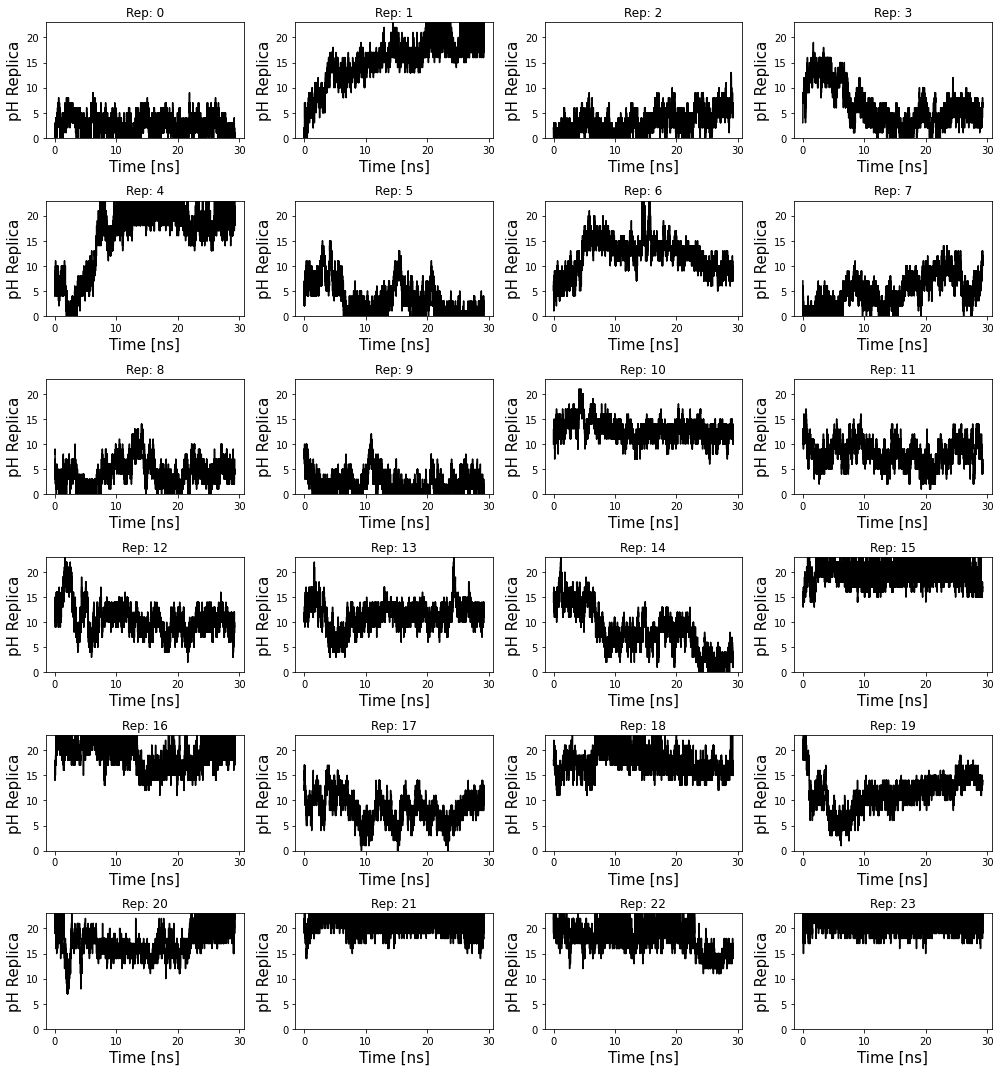

In [21]:
log_data.plot_replica_walk(xlabel='Time [ns]',  steps_to_time_conversion=(1/1000))